In [13]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5 = """
SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE expert_requests.overall_status like 'Request Complete'
and clients.status = 'Active'
"""
dataset5 = sqlio.read_sql_query(query5,conn)
df5 = pd.DataFrame(data=dataset5)
print(df5)

                           company              Specialty  request_id  \
0                        Signables                  Email         196   
1                           Doughp            Ad Creative         139   
2                             DEFY                 Amazon         203   
3                             DEFY                  Video         186   
4                           OPULUS            Advertising         276   
..                             ...                    ...         ...   
56                            DEFY             Copywriter         185   
57                       Signables            Advertising         205   
58      SuperSummary (Meyer Media)                  Email          49   
59  CollegeVine (Canopy Education)  Influencer Management         199   
60  CollegeVine (Canopy Education)            Advertising          53   

      overall_status  
0   Request Complete  
1   Request Complete  
2   Request Complete  
3   Request Complete  
4   Requ

41.21621621621622
59.45945945945946


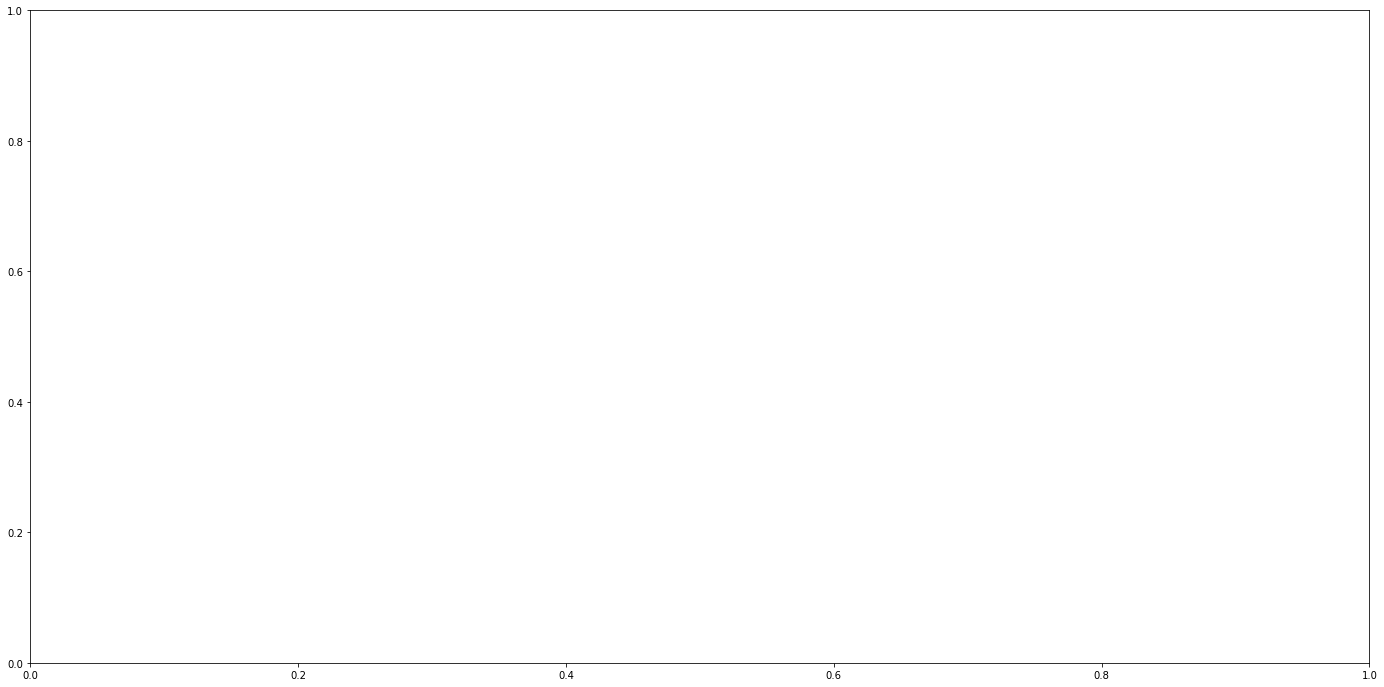

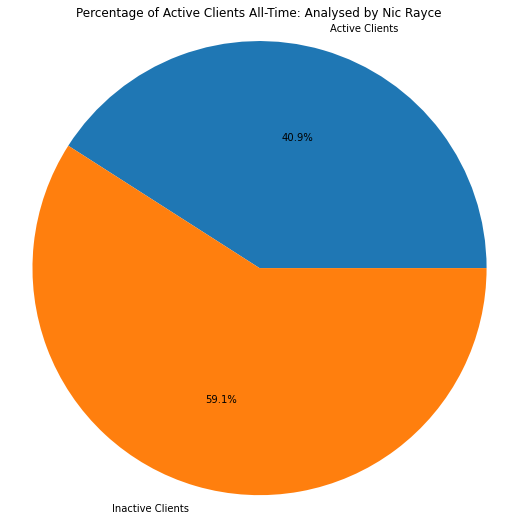

In [36]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query5a = """
SELECT 
  cast(
    sum(
      CASE WHEN "source"."overall_status" like 'Request Complete' THEN 1 ELSE 0 END
    ) as float ) / 148 * 100  AS "Number of Active Clients"
  FROM 
(SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active')"source"
"""
dataset5a = sqlio.read_sql_query(query5a,conn)
df5a = pd.DataFrame(data=dataset5a)
filtered1 = df5a.iloc[0,0]
print(filtered1)

query5b = """
SELECT 
cast(
    sum(
      CASE WHEN "source"."overall_status" not like 'Request Complete' THEN 1 ELSE 0 END
    ) as float ) / 148 * 100 AS "Number of Inactive Clients"
  FROM 
(SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active')"source"
"""
dataset5b = sqlio.read_sql_query(query5b,conn)
df5b = pd.DataFrame(data=dataset5b)
filtered2 = df5b.iloc[0,0]
print(filtered2)

fig, ax = plt.subplots(figsize=(24,12))
size = 0.3

status = ['Active Clients', 'Inactive Clients']
percentage = [filtered1, filtered2]
plt.figure(figsize=(9, 9))
plt.pie(percentage, labels = status, autopct='%0.1f%%')
plt.title("Percentage of Active Clients All-Time: Analysed by Nic Rayce")
plt.axis('equal')
plt.show()

ax.pie(df.groupby('Class')['count'].sum(), radius=1, 
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(df['count'], radius=1-size, 
       wedgeprops=dict(width=size, edgecolor='w'))


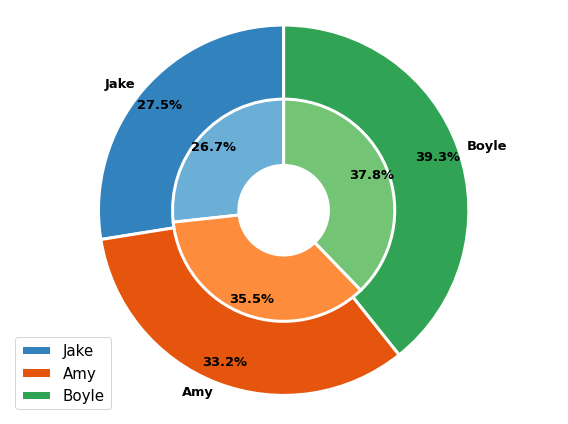

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Taking raw data of three students
source_data={'students':['Jake','Amy','Boyle'],
'math_score':[68,82,97],
'english_score':[70,93,99],
'physics_score':[73,85,95]}

# Segregating the raw data into usuable form
df=pd.DataFrame(source_data,columns=
['students','math_score','english_score','physics_score'])
df['cumulative_score']=df['math_score']+df['english_score']
+df['physics_score']

# Seperating the sub-parts of the given data
x1= df.iloc[0:3,1]
x2= df.iloc[0:3,2]

# Setting figure colors
cmap = plt.get_cmap("tab20c")
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap(np.array([1,5,9]))

# Setting the size of the figure
plt.figure(figsize=(8,6))

# Plotting the outer pie
plt.pie(x1, labels = df.iloc[0:3, 0], 
       startangle=90, pctdistance =0.88 ,colors=outer_colors,
       autopct = '%1.1f%%', radius= 1.0, labeldistance=1.05,
       textprops ={ 'fontweight': 'bold','fontsize':13},
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# PLotting the inner pie
plt.pie(x2,startangle=90, pctdistance =0.85,colors=inner_colors,
        autopct = '%1.1f%%',radius= 0.60,
       textprops ={'fontweight': 'bold' ,'fontsize':13}, 
       wedgeprops = {'linewidth' : 3, 'edgecolor' : "w" } )

# Creating the donut shape for the pie
centre_circle = plt.Circle((0,0), 0.25, fc='white')
fig= plt.gcf()
fig.gca().add_artist(centre_circle) # adding the centre circle

# Plotting the pie 
plt.axis('equal')  # equal aspect ratio
plt.legend( loc=3, fontsize =15)
plt.tight_layout()
plt.show()

In [74]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query = """
SELECT 
COUNT (*) as "Count",
CASE WHEN "source"."overall_status" like 'Request Complete' 
THEN 'Active' ELSE 'Inactive' END  AS "major_category", 
"source"."Specialty" AS "minor_category"
FROM 
(SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active') "source"
GROUP BY 2, 3
"""
dataset = sqlio.read_sql_query(query,conn)
df = pd.DataFrame(data=dataset)
pivot = pd.pivot_table(data=df, index='minor_category', columns='major_category', values='Count', fill_value=0).sort_values(by=['Count'])
df = df.pivot_table('Count', ['major_category', 'minor_category'])
df.to_csv('analysis24.csv')
print(df.to_markdown()) 

facecolor = '#fff'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Active Clients', 'Inactive Clients']
size = 0.3
vals = df['Count']
# Major category values = sum of minor category values
group_sum = df.groupby('major_category')['Count'].sum()

fig, ax = plt.subplots(figsize=(10,10), facecolor=facecolor)

a,b = [plt.cm.winter, plt.cm.cool]

outer_colors = ['#007eff', '#ff00f6']
inner_colors = ['#7abafb', '#70b5fc', '#62affd', '#53a7fe', '#429ffe', '#3498ff', '#2591ff', '#1186fe', '#0076ef', '#0270e0', '#0068d3', '#0161c3', '#0157af', '#014d9a', '#014489', '#003a74', '#013163', '#002a56',
                '#fbc9f9', '#fbb1f8', '#ffa1fc', '#fc89f8', '#fa72f5', '#fb5ef5', '#fc4bf6', '#fd37f6', '#fc22f4', '#fd10f5', '#ff00f6', '#df03d7', '#c701c0', '#ba02b4', '#a701a1', '#980193', '#860081', '#72016e', '#5c0159', '#6f106c', '#7b1a78', '#882685', '#963493', '#a1449e', '#a654a3', '#a561a3', '#9d699b', '#8b668a']

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

KeyError: 'Count'

                                                   Count
major_category minor_category                           
Active         Ad Creative                             1
               Advertising                            10
               Amazon                                  4
               Community / Social Media                1
               Copywriter                              5
               Copywriting                             4
               Development & Product-Build             5
               Email                                   7
               Google Ads                              2
               Graphic Design                          5
               Influencer Management                   1
               Photography                             2
               Product Marketing                       1
               Public Relations                        1
               SEO                                     7
               Social Media    

([<matplotlib.patches.Wedge at 0x179c4bdc160>,
 [Text(0.7698438663142632, 0.015505531216530841, ''),
  Text(0.7476251972199756, 0.18427307041939858, ''),
  Text(0.66683955152696, 0.3850000162588607, ''),
  Text(0.6247609241237756, 0.4500819788527486, ''),
  Text(0.5659543228797633, 0.5221069856013312, ''),
  Text(0.4625715198185625, 0.6155709455885204, ''),
  Text(0.34403478655493996, 0.6888686853385751, ''),
  Text(0.16918068711414805, 0.7511843283160164, ''),
  Text(0.03100472926695248, 0.769375530390123, ''),
  Text(-0.07740199492301651, 0.7660998180276102, ''),
  Text(-0.16918078052244295, 0.7511843072787243, ''),
  Text(-0.2142274997052138, 0.7395989307523725, ''),
  Text(-0.2584925259534338, 0.7253148378643672, ''),
  Text(-0.287488372239291, 0.7143181614849247, ''),
  Text(-0.3983501668960814, 0.6589515494585806, ''),
  Text(-0.5221070137514541, 0.5659542969105711, ''),
  Text(-0.5659543832199397, 0.5221069201936875, ''),
  Text(-0.5964458618543601, 0.48698288868995143, ''),
  T

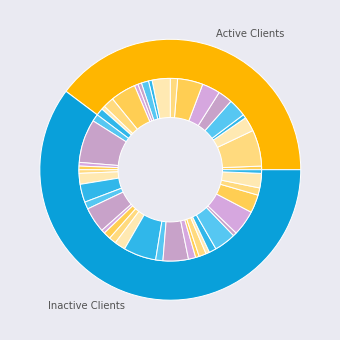

In [56]:
import psycopg2
import pandas as pd
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
conn = psycopg2.connect(
    user="ru6bjn2o1hw4oys",
    password="sPz531BWhOpWB3n8k2uo2sQ54pyHEcCnds6wodo6",
    host="evening-soiree.sequindb.com",
    database="db1np6imz7ub7rl")
query = """
SELECT 
COUNT (*) as "Count",
CASE WHEN "source"."overall_status" like 'Request Complete' 
THEN 'Active' ELSE 'Inactive' END  AS "major_category", 
"source"."Specialty" AS "minor_category"
FROM 
(SELECT
clients.company,
specialties.name as "Specialty",
expert_requests.request_id,
expert_requests.overall_status
FROM 
clients 
LEFT JOIN expert_requests
ON clients.id = expert_requests.client
INNER JOIN specialties ON array_to_string(expert_requests.expert_category, '', '*') = specialties.id
WHERE clients.status = 'Active') "source"
GROUP BY 2, 3
"""
dataset = sqlio.read_sql_query(query,conn)
df = pd.DataFrame(data=dataset)
pivot = pd.pivot_table(data=df, index='minor_category', columns='major_category', values='Count', fill_value=0).sort_values(by=['minor_category'])
df = df.pivot_table('Count', ['major_category', 'minor_category'])
df.to_csv('analysis24.csv')
print(df)

facecolor = '#eaeaf2'
font_color = '#525252'
hfont = {'fontname':'Calibri'}
labels = ['Active Clients', 'Inactive Clients']
size = 0.3
vals = df['Count']
# Major category values = sum of minor category values
group_sum = df.groupby('major_category')['Count'].sum()

fig, ax = plt.subplots(figsize=(10,6), facecolor=facecolor)

outer_colors = ['#FFB600', '#09A0DA','#8464a0']
inner_colors = ['#FFCE53', '#FFDA7E', '#FFE9B2', '#30B7EA', '#56C7F2', '#C8A2C9', '#D6A7DF']

ax.pie(group_sum, 
       radius=1, 
       colors=outer_colors, 
       labels=labels, 
       textprops={'color':font_color},
       wedgeprops=dict(width=size, edgecolor='w'))

ax.pie(vals, 
       radius=1-size, 
       colors=inner_colors,
       wedgeprops=dict(width=size, edgecolor='w'))

In [72]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.
